In [11]:
%matplotlib inline
contain = 'rawdata'
from utils.pathname import *
from utils.xyz import load_itk
import glob
from matplotlib import pyplot as plt
import numpy as np

from skimage.filters import roberts
from scipy import ndimage as nd

from skimage import morphology
from skimage import measure
from skimage.segmentation import clear_border
from sklearn.cluster import KMeans
from skimage.transform import resize

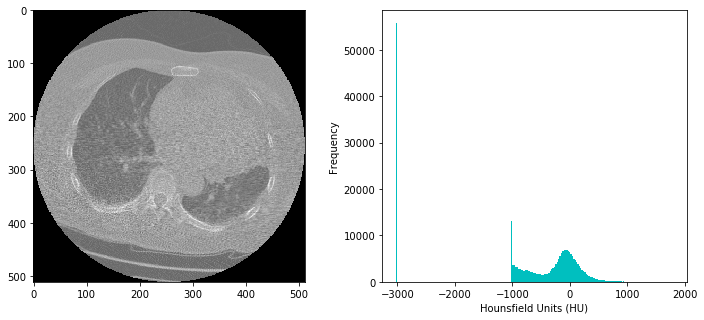

In [2]:
scan_folder = input_folder(contain)
imagePaths = glob.glob(join(scan_folder,'*.mhd'))

img3D,_,_ = load_itk(imagePaths[0])
img = img3D[60]
# plot
f,plots=plt.subplots(1,2,figsize=(12,5))
plots[0].imshow(img, cmap='gray')
plots[1].hist(img.flatten(), bins=200, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

## Thresholding

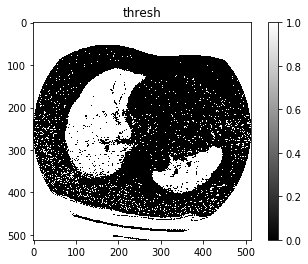

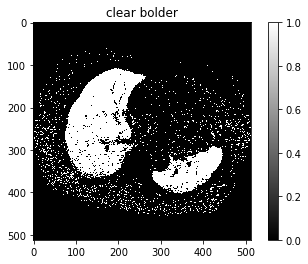

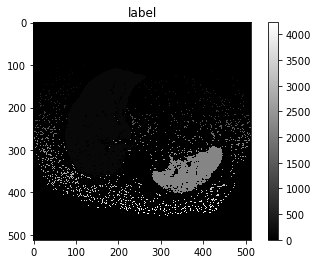

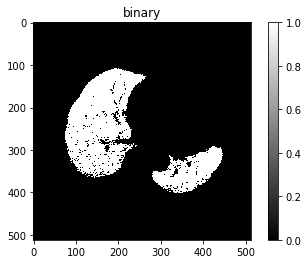

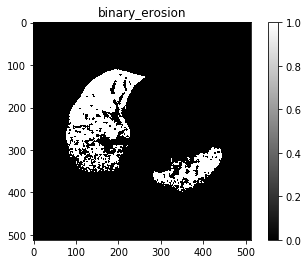

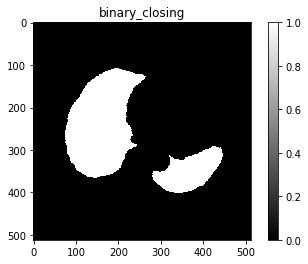

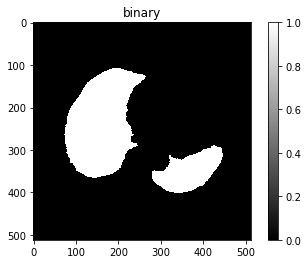

In [16]:
# thresh
thresh_img = np.where(img<-320,1.0,0.0)  # threshold the image
plt.imshow(thresh_img,cmap='gray')
plt.colorbar()
plt.title('thresh')
plt.show()
# clear border
cleared = clear_border(thresh_img)
plt.imshow(cleared,cmap='gray')
plt.colorbar()
plt.title('clear bolder')
plt.show()
# lable
label_image = morphology.label(cleared)
plt.imshow(label_image,cmap='gray')
plt.colorbar()
plt.title('label')
plt.show()
# keep the largest 2 area
areas = [r.area for r in measure.regionprops(label_image)]
areas.sort()
if len(areas) > 2:
    for region in measure.regionprops(label_image):
        if region.area < areas[-2]:
            for coordinates in region.coords:                
                   label_image[coordinates[0], coordinates[1]] = 0
binary = label_image > 0
plt.imshow(binary,cmap='gray')
plt.colorbar()
plt.title('binary')
plt.show()
# erosion
binary_erosion = morphology.binary_erosion(binary,morphology.disk(2))
plt.imshow(binary_erosion,cmap='gray')
plt.colorbar()
plt.title('binary_erosion')
plt.show()
# closing
binary_closing = morphology.binary_closing(binary,morphology.disk(10))
plt.imshow(binary_closing,cmap='gray')
plt.colorbar()
plt.title('binary_closing')
plt.show()

edges = roberts(binary_closing)
binary = nd.binary_fill_holes(edges)
plt.imshow(binary,cmap='gray')
plt.title('binary')
plt.colorbar()
plt.show()